In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, precision_recall_fscore_support, roc_auc_score
#!pip install scikit-plot
import scikitplot as skplt

In [2]:
df = pd.read_csv("Group_4_data_cleaned.csv")
df=df.iloc[:,1:]

In [3]:
df.head()

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,1,-1,1,-1,-1,1,1,1,0,0
1,-1,-1,-1,-1,-1,0,1,1,1,1
2,1,-1,0,0,-1,0,-1,1,0,1
3,1,0,1,-1,-1,0,1,1,0,0
4,-1,-1,1,-1,0,0,-1,1,0,1


In [4]:
df.shape

(1353, 10)

In [5]:
for column in list(df.columns):
    print(column," unique Values are",df[column].unique())

SFH  unique Values are [ 1 -1  0]
popUpWidnow  unique Values are [-1  0  1]
SSLfinal_State  unique Values are [ 1 -1  0]
Request_URL  unique Values are [-1  0  1]
URL_of_Anchor  unique Values are [-1  0  1]
web_traffic  unique Values are [ 1  0 -1]
URL_Length  unique Values are [ 1 -1  0]
age_of_domain  unique Values are [ 1 -1]
having_IP_Address  unique Values are [0 1]
Result  unique Values are [ 0  1 -1]


In [6]:
#Information about the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   SFH                1353 non-null   int64
 1   popUpWidnow        1353 non-null   int64
 2   SSLfinal_State     1353 non-null   int64
 3   Request_URL        1353 non-null   int64
 4   URL_of_Anchor      1353 non-null   int64
 5   web_traffic        1353 non-null   int64
 6   URL_Length         1353 non-null   int64
 7   age_of_domain      1353 non-null   int64
 8   having_IP_Address  1353 non-null   int64
 9   Result             1353 non-null   int64
dtypes: int64(10)
memory usage: 105.8 KB


In [7]:
df.isnull().sum()

SFH                  0
popUpWidnow          0
SSLfinal_State       0
Request_URL          0
URL_of_Anchor        0
web_traffic          0
URL_Length           0
age_of_domain        0
having_IP_Address    0
Result               0
dtype: int64

In [8]:
df.cov()

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
SFH,0.839769,0.233947,0.277789,0.188515,0.286310,-0.138314,0.105869,0.145945,0.012657,-0.593454
popUpWidnow,0.233947,0.461139,0.121743,0.060560,0.106660,-0.076923,0.070543,0.050909,0.026698,-0.330501
SSLfinal_State,0.277789,0.121743,0.676001,0.037634,0.068145,-0.113905,0.059596,0.166979,0.028291,-0.407232
Request_URL,0.188515,0.060560,0.037634,0.639491,0.252523,-0.029586,0.029533,0.041637,0.003400,-0.207377
URL_of_Anchor,0.286310,0.106660,0.068145,0.252523,0.876587,-0.069527,0.069668,0.063213,0.011757,-0.256561
web_traffic,-0.138314,-0.076923,-0.113905,-0.029586,-0.069527,0.650888,-0.066568,-0.538462,-0.024408,0.187870
URL_Length,0.105869,0.070543,0.059596,0.029533,0.069668,-0.066568,0.581486,0.056069,0.040125,-0.133280
age_of_domain,0.145945,0.050909,0.166979,0.041637,0.063213,-0.538462,0.056069,0.952518,0.012556,-0.216121
having_IP_Address,0.012657,0.026698,0.028291,0.003400,0.011757,-0.024408,0.040125,0.012556,0.101511,-0.018016
Result,-0.593454,-0.330501,-0.407232,-0.207377,-0.256561,0.187870,-0.133280,-0.216121,-0.018016,0.911591


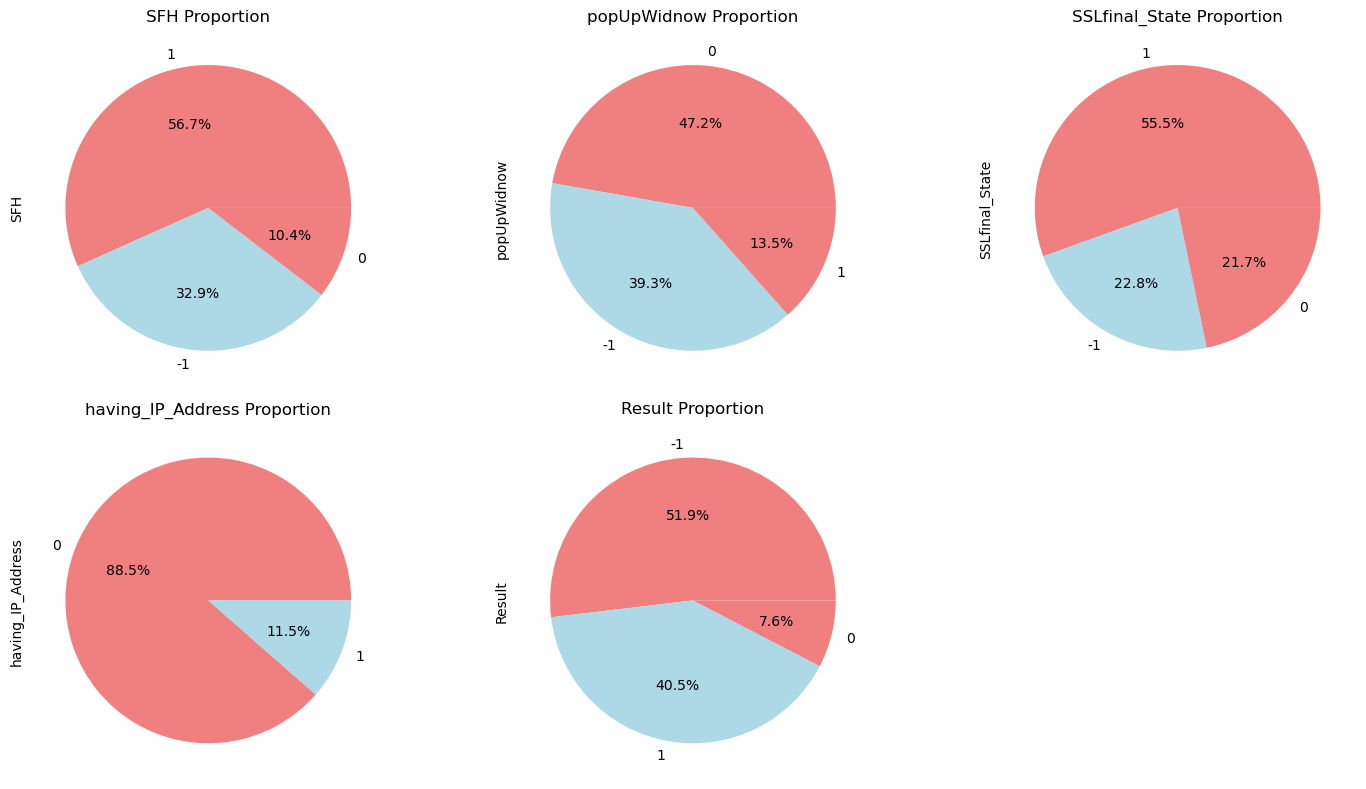

In [9]:
# Pie Chart 
binary_columns = ['SFH', 'popUpWidnow', 'SSLfinal_State', 'having_IP_Address', 'Result']

plt.figure(figsize=(15, 8))
for i, col in enumerate(binary_columns, 1):
    plt.subplot(2, 3, i)
    df[col].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
    plt.title(f'{col} Proportion')

plt.tight_layout()
plt.show()

Visualizing binary variables like 'SFH,' 'popUpWidnow,' etc., with pie charts to see the proportion of occurrences (0 or 1). It helps quickly understand the prevalence of features or conditions. Stacked bar charts, like for 'SSLfinal_State vs. Result,' show the distribution relationship between binary variables and the target variable.

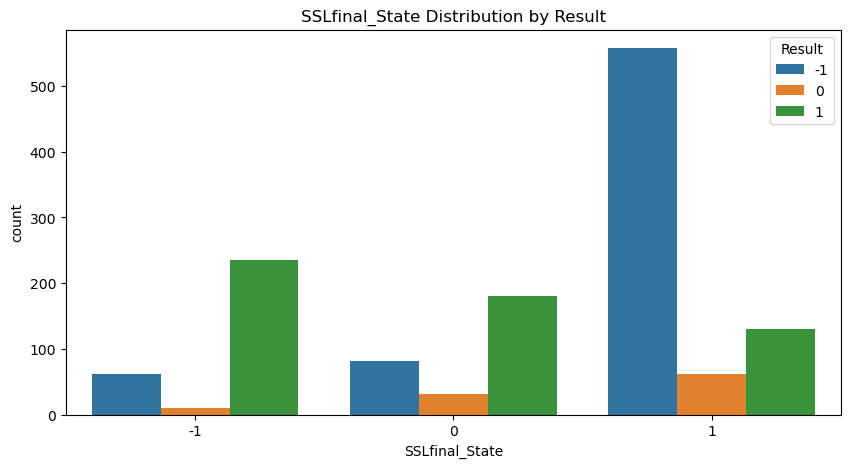

In [10]:
# Stacked Bar Chart for SSLfinal_State vs. Result
plt.figure(figsize=(10, 5))
sns.countplot(x='SSLfinal_State', data=df, hue='Result')
plt.title('SSLfinal_State Distribution by Result')
plt.show()

Examining the distribution of SSL final states concerning phishing outcomes through a stacked bar chart. This visualization reveals patterns, showcasing how specific SSL final states correlate with phishing and non-phishing instances. Understanding these associations aids in identifying potential indicators of phishing activities based on SSL final states.

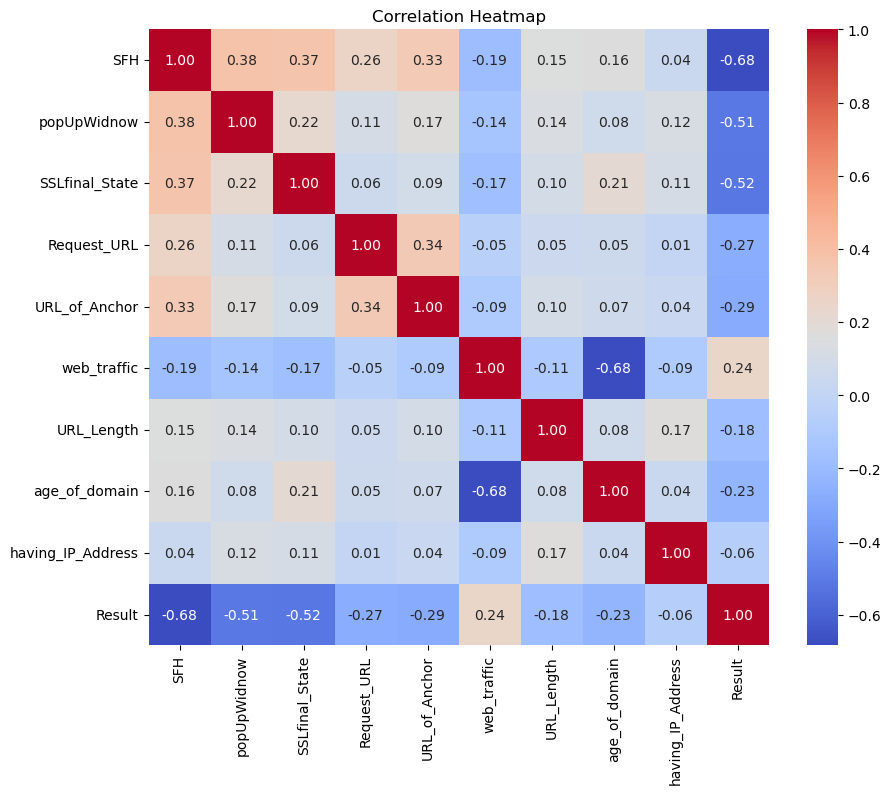

In [11]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

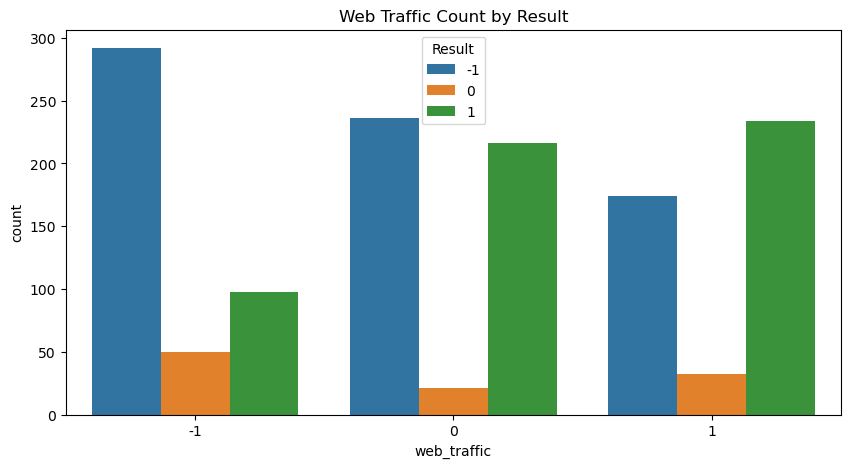

In [12]:
# Count Plot for Web Traffic
plt.figure(figsize=(10, 5))
sns.countplot(x='web_traffic', data=df, hue='Result')
plt.title('Web Traffic Count by Result')
plt.show()

In [13]:
from scipy.stats import kurtosis, skew

# Assuming 'df' is your DataFrame
# Replace 'df' with your actual DataFrame variable

for column in df.columns:
    kurt = kurtosis(df[column])
    skewness = skew(df[column])
    print(f"Column: {column}, Kurtosis: {kurt:.2f}, Skewness: {skewness:.2f}")


Column: SFH, Kurtosis: -1.63, Skewness: -0.49
Column: popUpWidnow, Kurtosis: -0.84, Skewness: 0.37
Column: SSLfinal_State, Kurtosis: -1.20, Skewness: -0.67
Column: Request_URL, Kurtosis: -1.32, Skewness: 0.42
Column: URL_of_Anchor, Kurtosis: -1.86, Skewness: 0.05
Column: web_traffic, Kurtosis: -1.46, Skewness: 0.00
Column: URL_Length, Kurtosis: -1.27, Skewness: 0.09
Column: age_of_domain, Kurtosis: -1.80, Skewness: -0.45
Column: having_IP_Address, Kurtosis: 3.86, Skewness: 2.42
Column: Result, Kurtosis: -1.86, Skewness: 0.23


# KNN MODEL

In [14]:
#Split the data into training and testing sets using the train_test_split() function from sklearn.model_selection
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:-1], df.iloc[:,-1], test_size=0.3, random_state=42)

In [15]:
X_train.head()

,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address
782,-1,1,1,0,1,1,-1,0
12,-1,0,-1,1,0,1,1,0
1213,0,1,1,1,0,1,1,0
171,0,-1,-1,1,1,0,-1,0
598,0,1,0,-1,0,0,-1,0


In [16]:
y_train.head()

782    -1
12      1
1213   -1
171     1
598    -1
Name: Result, dtype: int64

In [17]:
y_train.value_counts()

-1    499
 1    380
 0     68
Name: Result, dtype: int64

In [18]:
y_train.shape

(947,)

In [19]:
# create the classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [20]:
# predictin on the test set
y_pred = knn.predict(X_test)

In [21]:
pip install -U imbalanced-learn


DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


In [22]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train_bal, y_train_bal = oversample.fit_resample(X_train, y_train)

In [23]:
y_train_bal.value_counts()

-1    499
 1    499
 0    499
Name: Result, dtype: int64

In [24]:
# create the classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
knn.fit(X_train_bal, y_train_bal)

KNeighborsClassifier(n_neighbors=3)

In [25]:
# predictin on the test set
y_pred = knn.predict(X_test)

In [26]:
# Calculate Model Accuracy
print("Accuracy of testing dataset:", accuracy_score(y_test, y_pred))

Accuracy of testing dataset: 0.7955665024630542


In [27]:
y_train_pred=knn.predict(X_train_bal)

In [28]:
print("Accuracy of training dataset:", accuracy_score(y_train_bal, y_train_pred))

Accuracy of training dataset: 0.897127588510354


In [29]:
from sklearn.model_selection import GridSearchCV

k_range = list(range(1, 51))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
#grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=True,verbose=1)
gs = GridSearchCV(estimator = KNeighborsClassifier(),
                  param_grid = {"n_neighbors": range(1,51),
                                "weights": ['uniform', 'distance'],
                                "p": [1,2]},
                  cv=5)

  
# fitting the model for grid search
grid_search=gs.fit(X_train, y_train)

In [30]:
# Finding the best parameter for KNN classifier
print(grid_search.best_params_)

{'n_neighbors': 5, 'p': 2, 'weights': 'distance'}


In [31]:
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Accuracy for our training dataset with tuning is : 82.05%


In [32]:
# Evaluate the model performance
knn3=KNeighborsClassifier(n_neighbors= 5, p= 2, weights= 'distance')
knn3.fit(X_train,y_train)

KNeighborsClassifier(weights='distance')

In [33]:
#Fit the model to the training data.
y_pred3=knn3.predict(X_test)

In [34]:
# calculate accuracy of the model
accuracy = accuracy_score(y_test, y_pred3)*100
print("Accuracy for our testing dataset is : {:.2f}%".format(accuracy))

Accuracy for our testing dataset is : 81.53%


In [35]:
y_train_pred3=knn3.predict(X_train_bal)
accuracy = accuracy_score(y_train_bal, y_train_pred3)*100
print("Accuracy for our training dataset is : {:.2f}%".format(accuracy) )

Accuracy for our training dataset is : 88.24%


In [36]:
cm=confusion_matrix(y_test, y_pred3)
cm

array([[175,   4,  24],
       [  7,  21,   7],
       [ 30,   3, 135]])

Text(50.722222222222214, 0.5, 'Actual/Observed')

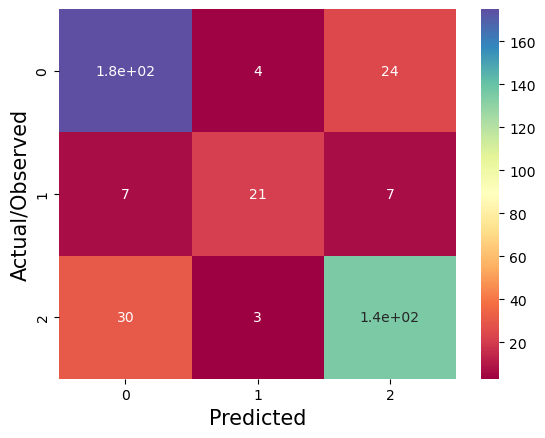

In [37]:
sns.heatmap(cm, 
            annot=True, 
            cmap="Spectral")
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual/Observed', fontsize=15)

In [38]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

          -1       0.83      0.86      0.84       203
           0       0.75      0.60      0.67        35
           1       0.81      0.80      0.81       168

    accuracy                           0.82       406
   macro avg       0.80      0.76      0.77       406
weighted avg       0.81      0.82      0.81       406



By using grid search algorithm, we finetunned the knn model to arrive at the best value of hyper parameter. With these values we trained the knn and got the accuracies.

/Users/sarveswararaopatchipulusu/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


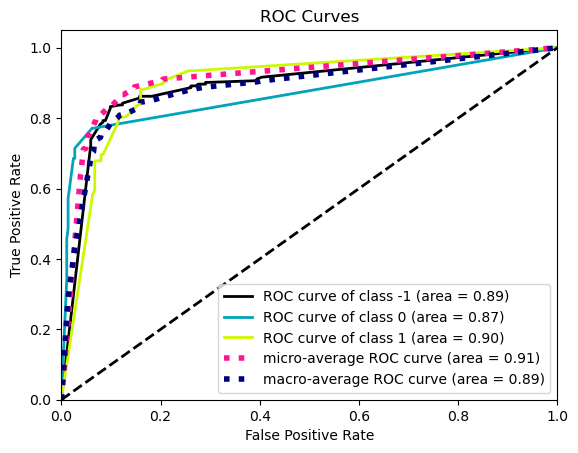

In [39]:
y_probas = knn3.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_probas)
plt.show()

In [40]:
precision_recall_fscore_support(y_test, y_pred3)

(array([0.8254717 , 0.75      , 0.81325301]),
 array([0.86206897, 0.6       , 0.80357143]),
 array([0.84337349, 0.66666667, 0.80838323]),
 array([203,  35, 168]))

In [41]:
from sklearn.metrics import confusion_matrix, classification_report, recall_score, accuracy_score, roc_auc_score,f1_score

# Trainina and testing accuracy
y_train_pred = knn3.predict(X_train)
y_test_pred  = knn3.predict(X_test)
print(f" The accuracy for testing data is {accuracy_score(y_test,y_pred3)}")
print(f" The recall score for testing data is {recall_score(y_test,y_pred3,average='weighted')} ")
print(f" The f-1 score for the testing data is {f1_score(y_test,y_pred3,average='weighted')} ")

y_test_roc = knn3.predict_proba(X_test)
test_roc_score = roc_auc_score(y_test,y_test_roc,average='macro',multi_class='ovo')
print(f" The testing roc auc score {test_roc_score}")

 The accuracy for testing data is 0.8152709359605911
 The recall score for testing data is 0.8152709359605911 
 The f-1 score for the testing data is 0.813661418334913 
 The testing roc auc score 0.8833338220345609


# Important features with Random Forest model

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [44]:
#  feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores


SSLfinal_State       0.222158
popUpWidnow          0.207008
Request_URL          0.179283
URL_of_Anchor        0.126149
URL_Length           0.113788
web_traffic          0.083754
age_of_domain        0.042666
having_IP_Address    0.025196
dtype: float64

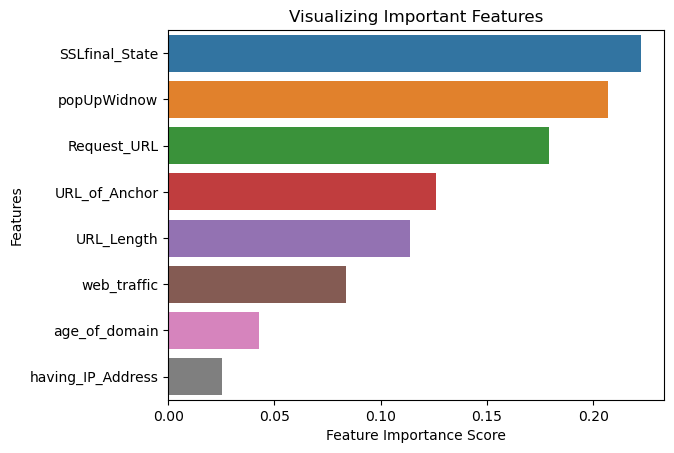

In [45]:
# Creating  

sns.barplot(x=feature_scores, y=feature_scores.index)



#  labels 

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')



#  title 

plt.title("Visualizing Important Features")



# Visualize 

plt.show()

# Random Forest Classifier model with parameter n_estimators

In [46]:
X = df.drop(['Result'], axis=1)

y = df['Result']

In [47]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [48]:
# classifier with n_estimators = 100

clf = RandomForestClassifier(random_state=0)



# fit the model to the training set

model = clf.fit(X_train, y_train)


# Predict on the test set results

y_pred = clf.predict(X_test)



# Check accuracy score 

print('Model accuracy score : {0:0.5f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score : 0.89262


In [49]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[205   3  20]
 [  2  29   4]
 [ 17   2 165]]


[[205   3  20]
 [  2  29   4]
 [ 17   2 165]]


<Axes: xlabel='Predicted', ylabel='Actual'>

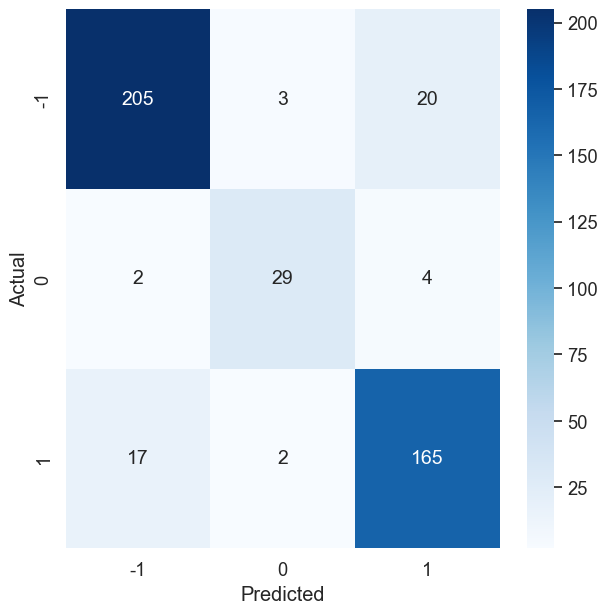

In [50]:
#array = print(confusion_matrix(y_test, predictions_test))
labels = ['Positives','Negatives']
cm = confusion_matrix(y_test, y_pred)
print(cm)

df_cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'


plt.figure(figsize = (7,7))
sns.set(font_scale=1.2)
sns.heatmap(df_cm, cmap="Blues", annot=True, fmt = 'g',annot_kws={"size": 14})# font size


In [51]:
pip install scikit-plot

DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


/Users/sarveswararaopatchipulusu/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


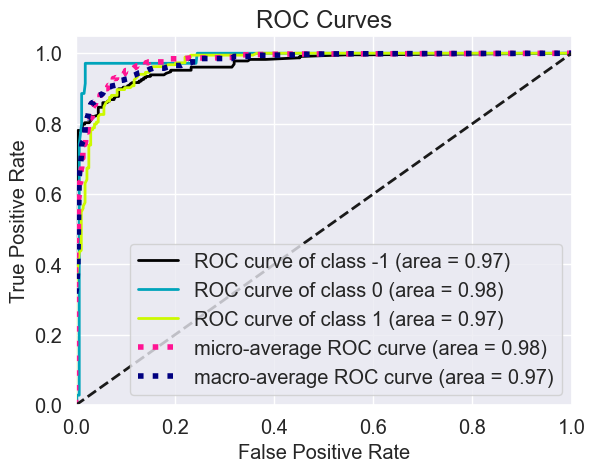

In [52]:

import sklearn.metrics as metrics
import scikitplot as skplt
import matplotlib.pyplot as plt

#y_true = # ground truth labels
y_probas =  model.predict_proba(X_test) # predicted probabilities generated by sklearn classifier
skplt.metrics.plot_roc_curve(y_test, y_probas)
plt.show()

In [53]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.92      0.90      0.91       228
           0       0.85      0.83      0.84        35
           1       0.87      0.90      0.88       184

    accuracy                           0.89       447
   macro avg       0.88      0.87      0.88       447
weighted avg       0.89      0.89      0.89       447



# clustering techniques to improve test results

In [54]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [55]:
inertia = []

for k in range(1,16):
    km = KMeans(n_clusters=k, init="k-means++", max_iter=300, n_init=10)
    km.fit(X)
    inertia.append(km.inertia_)
inertia

[7813.733924611975,
 6026.4010028672965,
 5100.538510184882,
 4603.668565032375,
 4151.755479752347,
 3862.066406149228,
 3548.485088273059,
 3339.0769388327244,
 3168.7051390827764,
 3034.053145361149,
 2951.550974201651,
 2821.3671819637966,
 2737.2346972282057,
 2691.787085481598,
 2596.74309488533]

In [56]:
pip install yellowbrick


DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


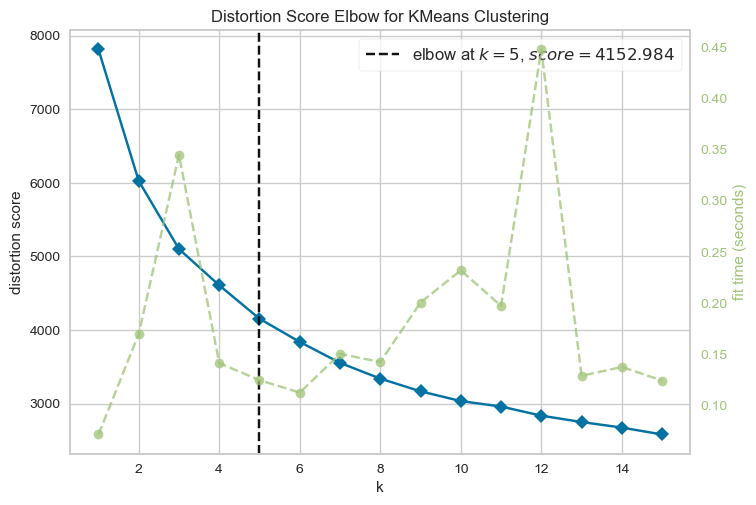

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [57]:
from  yellowbrick.cluster import KElbowVisualizer
km=KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(1,16))

visualizer.fit(X)
visualizer.show()

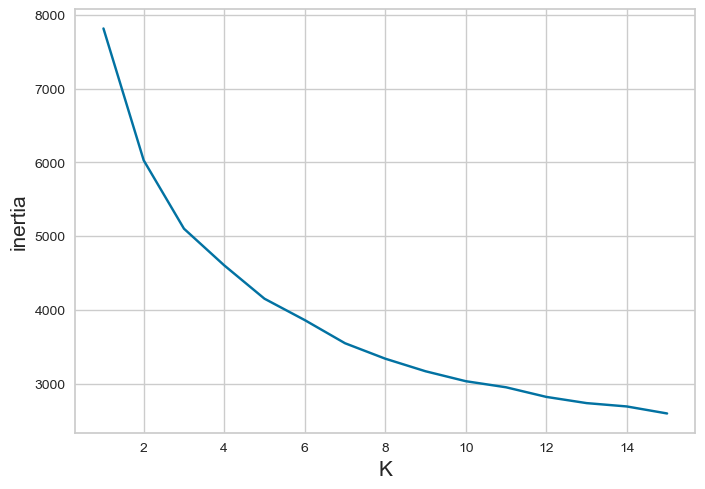

In [58]:
plt.plot(range(1,16), inertia)
plt.xlabel('K', fontsize=15)
plt.ylabel('inertia', fontsize=15);

In [59]:
kmeans = KMeans(n_clusters=5, init="k-means++", max_iter=1000, n_init=10).fit(X)

In [60]:
cluster = kmeans.predict(X)
cluster

array([4, 2, 4, ..., 3, 1, 0], dtype=int32)

In [61]:
df['Cluster'] = cluster
df

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result,Cluster
0,1,-1,1,-1,-1,1,1,1,0,0,4
1,-1,-1,-1,-1,-1,0,1,1,1,1,2
2,1,-1,0,0,-1,0,-1,1,0,1,4
3,1,0,1,-1,-1,0,1,1,0,0,4
4,-1,-1,1,-1,0,0,-1,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...
1348,-1,-1,-1,-1,-1,-1,0,1,0,1,2
1349,-1,0,1,0,-1,0,0,1,0,-1,2
1350,-1,0,-1,-1,-1,0,-1,-1,0,1,3
1351,0,0,1,0,0,0,-1,1,0,1,1


In [62]:
kmeans.labels_

array([4, 2, 4, ..., 3, 1, 0], dtype=int32)

In [63]:
kmeans.cluster_centers_

array([[ 0.8988764 , -0.05992509,  0.46441948, -0.082397  ,  0.12734082,
         0.68539326,  0.01123596, -1.        ,  0.11235955],
       [ 0.78365385, -0.07451923,  0.57451923,  0.12980769,  0.85096154,
        -0.54567308,  0.07932692,  1.        ,  0.14903846],
       [-0.92982456, -0.60087719,  0.06140351, -0.57894737, -0.68859649,
        -0.23245614, -0.15789474,  1.        ,  0.09210526],
       [-0.81609195, -0.59386973, -0.24521073, -0.47509579, -0.34482759,
         0.69348659, -0.26436782, -1.        ,  0.08429119],
       [ 1.        , -0.06077348,  0.71823204, -0.43093923, -0.96685083,
        -0.4640884 , -0.01657459,  1.        ,  0.11049724]])

In [64]:
kmeans.transform(X)

# measures the distance from each instance to every centroid
# this can be used as a transformation from a high dimensional space to a lower dimensional space

array([[2.89533458, 3.00762944, 2.81192006, 3.37907359, 2.11557487],
       [3.8706864 , 3.61788669, 1.94527309, 2.89677724, 3.19365213],
       [2.80932832, 2.48218039, 2.2563477 , 3.03437149, 1.66719058],
       ...,
       [3.06132755, 3.9816488 , 2.55704387, 1.64017346, 3.53208961],
       [2.57418104, 1.7397138 , 1.92031148, 2.81834039, 1.84345029],
       [1.93358929, 2.54907002, 3.88359795, 3.19610281, 3.34572699]])

In [65]:
kmeans.inertia_
kmeans.score(X)

-4158.681803884751

In [66]:
silhouette_samples(X, kmeans.labels_)

array([ 0.22414169,  0.24897574,  0.22657338, ...,  0.24376058,
       -0.06088705,  0.15078111])

In [67]:
silhouette_score(X, kmeans.labels_)

0.201420825444313

Text(0, 0.5, 'Silhouette Score')

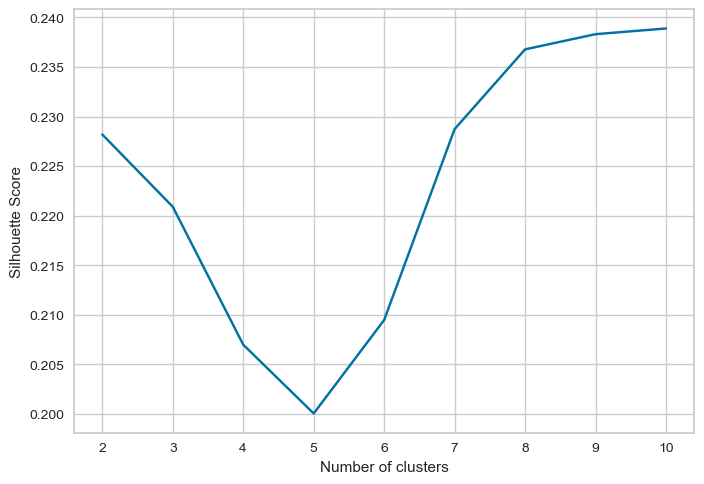

In [68]:
sil = []
kmax = 10

for k in range(2, kmax+1):
    km = KMeans(n_clusters = k).fit(X)
    sil.append(silhouette_score(X, km.labels_, metric = 'euclidean'))
    
plt.plot(range(2,11),sil)

plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

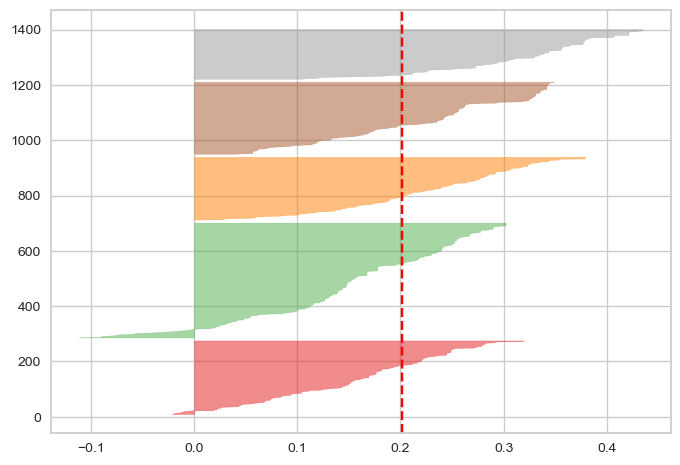

In [69]:
from yellowbrick.cluster import SilhouetteVisualizer

visualizer = SilhouetteVisualizer(kmeans)
visualizer.fit(X);

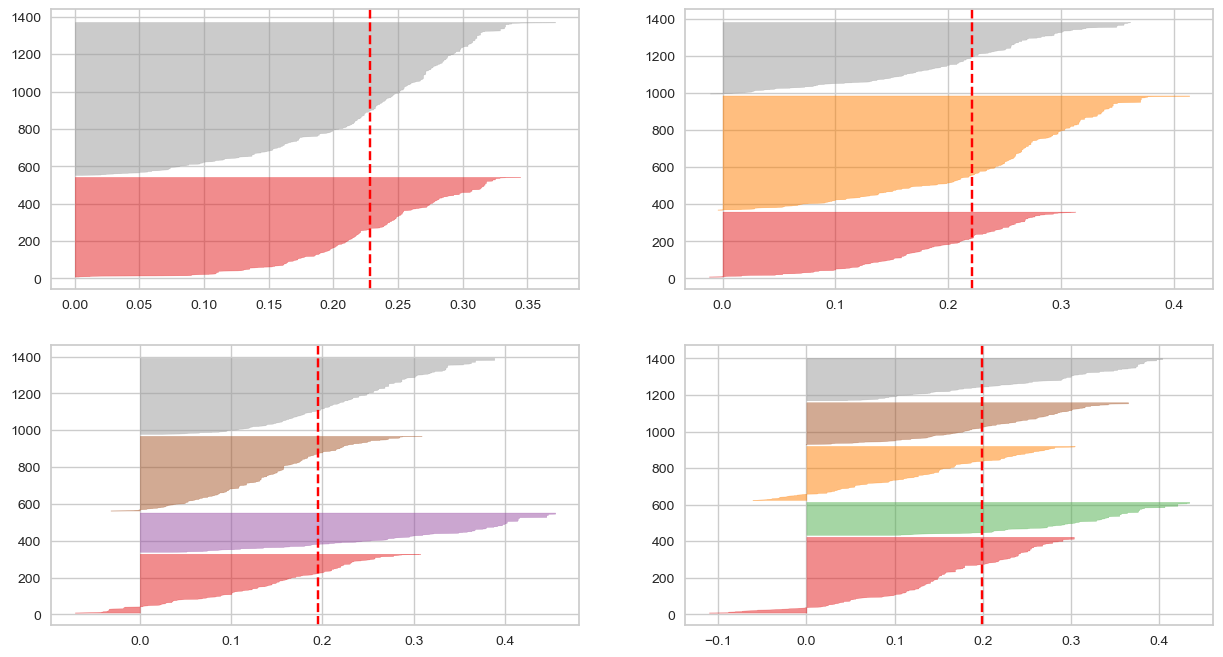

In [70]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for k in range(2,6):

    km = KMeans(n_clusters=k)
    q, mod = divmod(k, 2)

    visualizer = SilhouetteVisualizer(km, ax=ax[q-1][mod])
    visualizer.fit(X)

# pca

In [71]:
from sklearn.decomposition import PCA

pca_=PCA(n_components=2,random_state=0)
pca_.fit(X)
pca_xnorm=pca_.transform(X)

Text(0.5, 0, 'PCA Comp 2')

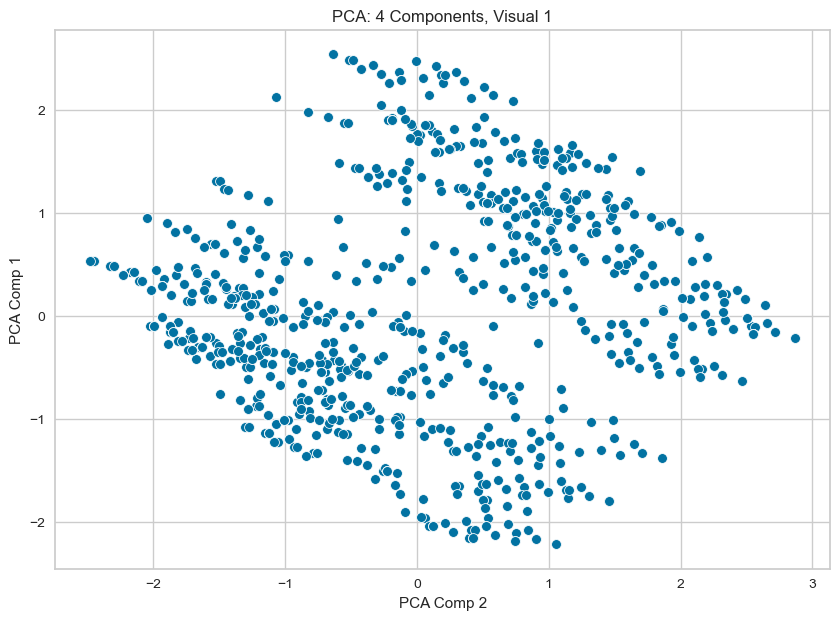

In [72]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=pca_xnorm[:,0],y=pca_xnorm[:,1],s=50)
plt.title('PCA: 4 Components, Visual 1') #title
plt.ylabel('PCA Comp 1') #x label
plt.xlabel('PCA Comp 2') #y label

Text(0, 0.5, 'PC 2')

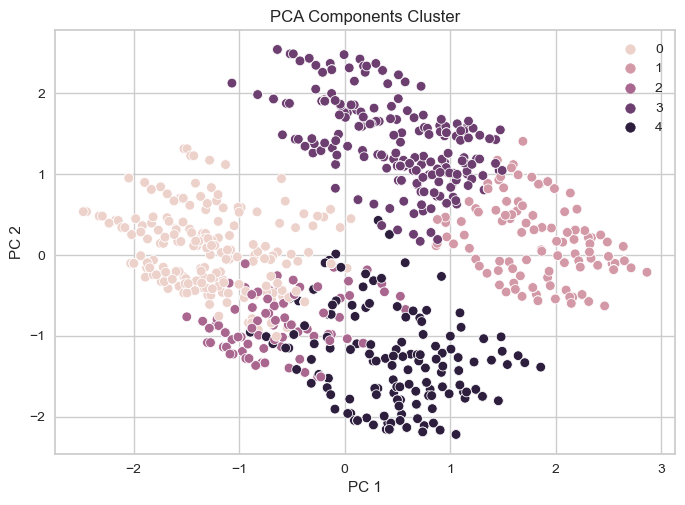

In [73]:
kmeans = KMeans(n_clusters=5, init="k-means++", max_iter=1000, n_init=10).fit(X)
sns.scatterplot(data = pca_xnorm, x=pca_xnorm[:,0],y=pca_xnorm[:,1],hue=kmeans.labels_)
plt.title('PCA Components Cluster')
# Set x-axis label
plt.xlabel('PC 1')
# Set y-axis label
plt.ylabel('PC 2')

# ensembling method

In [74]:
pip install pyml


DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


In [75]:
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import VotingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
#from pyml.ensemble import ELMClassifier

In [76]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
# Oversampling and transform the dataset
import imblearn
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train,y_train= oversample.fit_resample(X_train, y_train)

In [78]:
# Define the four classifiers with best parameters
clf1 =SGDClassifier(penalty='l2', n_jobs=1, loss='log_loss', alpha=0.1)

clf2 = KNeighborsClassifier(n_neighbors= 6, p= 1, weights= 'distance')
clf3 = RandomForestClassifier(n_estimators = 20, 
                               max_features = "sqrt", 
                               max_depth = 90,
                               oob_score = True)
clf4 = SVC(kernel="linear", C = 1, gamma =1)
clf5 = MLPClassifier(activation='logistic', alpha=0.01, hidden_layer_sizes=(200,),
              learning_rate='adaptive')
#clf6 = ELMClassifier(alpha=0.001, n_neurons=1000)

In [79]:
# Create an ensemble model using voting
ensemble_model = VotingClassifier(estimators=[('sgd', clf1), ('knn', clf2), ('rf', clf3),('svc', clf4),('MLP', clf5)], voting='hard')

In [80]:
# Train the ensemble model on the training data
ensemble_model.fit(X_train, y_train)

VotingClassifier(estimators=[('sgd',
                              SGDClassifier(alpha=0.1, loss='log_loss',
                                            n_jobs=1)),
                             ('knn',
                              KNeighborsClassifier(n_neighbors=6, p=1,
                                                   weights='distance')),
                             ('rf',
                              RandomForestClassifier(max_depth=90,
                                                     n_estimators=20,
                                                     oob_score=True)),
                             ('svc', SVC(C=1, gamma=1, kernel='linear')),
                             ('MLP',
                              MLPClassifier(activation='logistic', alpha=0.01,
                                            hidden_layer_sizes=(200,),
                                            learning_rate='adaptive'))])

In [81]:
y_pred = ensemble_model.predict(X_test)

In [82]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of athe ensemble model: {:.2f}%'.format(accuracy*100))

Accuracy of athe ensemble model: 81.92%


In [83]:
cm= confusion_matrix(y_test, y_pred)
print(cm)

[[108  17   7]
 [  4  16   5]
 [  9   7  98]]


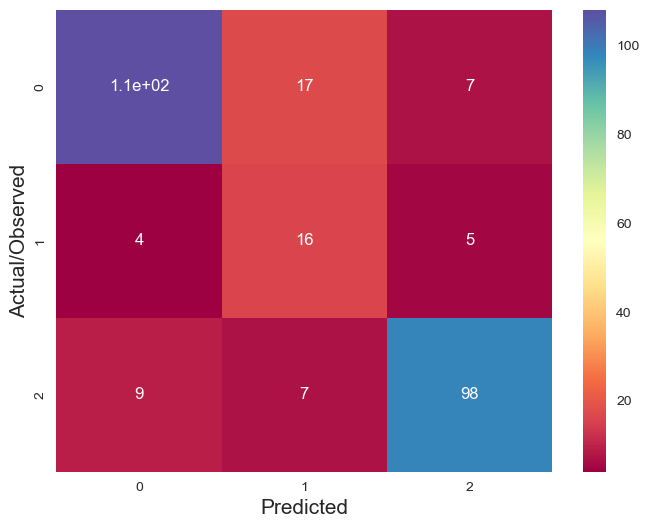

In [84]:
plt.figure(figsize = (8,6))

sns.heatmap(cm, 
            annot=True, 
            cmap="Spectral")
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual/Observed', fontsize=15);

In [85]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.89      0.82      0.85       132
           0       0.40      0.64      0.49        25
           1       0.89      0.86      0.88       114

    accuracy                           0.82       271
   macro avg       0.73      0.77      0.74       271
weighted avg       0.85      0.82      0.83       271

